In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors

In [207]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


# 1. Загрузить файл HR.csv в pandas dataframe

In [10]:
df = pd.read_csv('C:\\Users\\kuznecov.ap\\Desktop\\piton\\23. диплом\\HR.csv')
df.head()
# df.info()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# В датафрейме есть две категориальные переменные типа object. Переводим их в числовые значения типа int64
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [15]:
# определяем сколько и каких различных значений в сириес "department"
obj_df["department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [16]:
# определяем склько и каких различных значений в сериес "department"
obj_df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [18]:
# создадим словарь сопоставления, содержащий столбец для обработки (ключ словаря), а также словарь значений для замены
cleanup_nums = {"salary":     {"low": 1, "medium": 2, "high": 3},
                "department": {"sales": 1, "technical": 2, "support": 3, "IT": 4,
                                  "product_mng": 5, "marketing": 5, "RandD":6,
                              "accounting": 7, "hr": 8, "management": 9}}

In [19]:
# преобразовываем столбцы в числа с помощью replace
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

,department,salary
0,1,1
1,1,2
2,1,2
3,1,1
4,1,1


In [20]:
obj_df.dtypes

department    int64
salary        int64
dtype: object

In [24]:
# заменяем столбцы в датафрейме df на столбцы obj_df
df['department'] = obj_df['department']
df['salary'] = obj_df['salary']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


# 2. Рассчитать основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).


In [25]:
# Рассчитаем статистики:  среднее, ст. отклонение, мин/макс)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.443430,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.382143,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,3.000000


In [31]:
df.mode() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,1.0,1.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
department                 3.00
salary                     2.00
dtype: float64

# 3. Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [ ]:
# Поскольку я перевел все переменные в числовой вид- значит можно брать все столбцы датафрейма

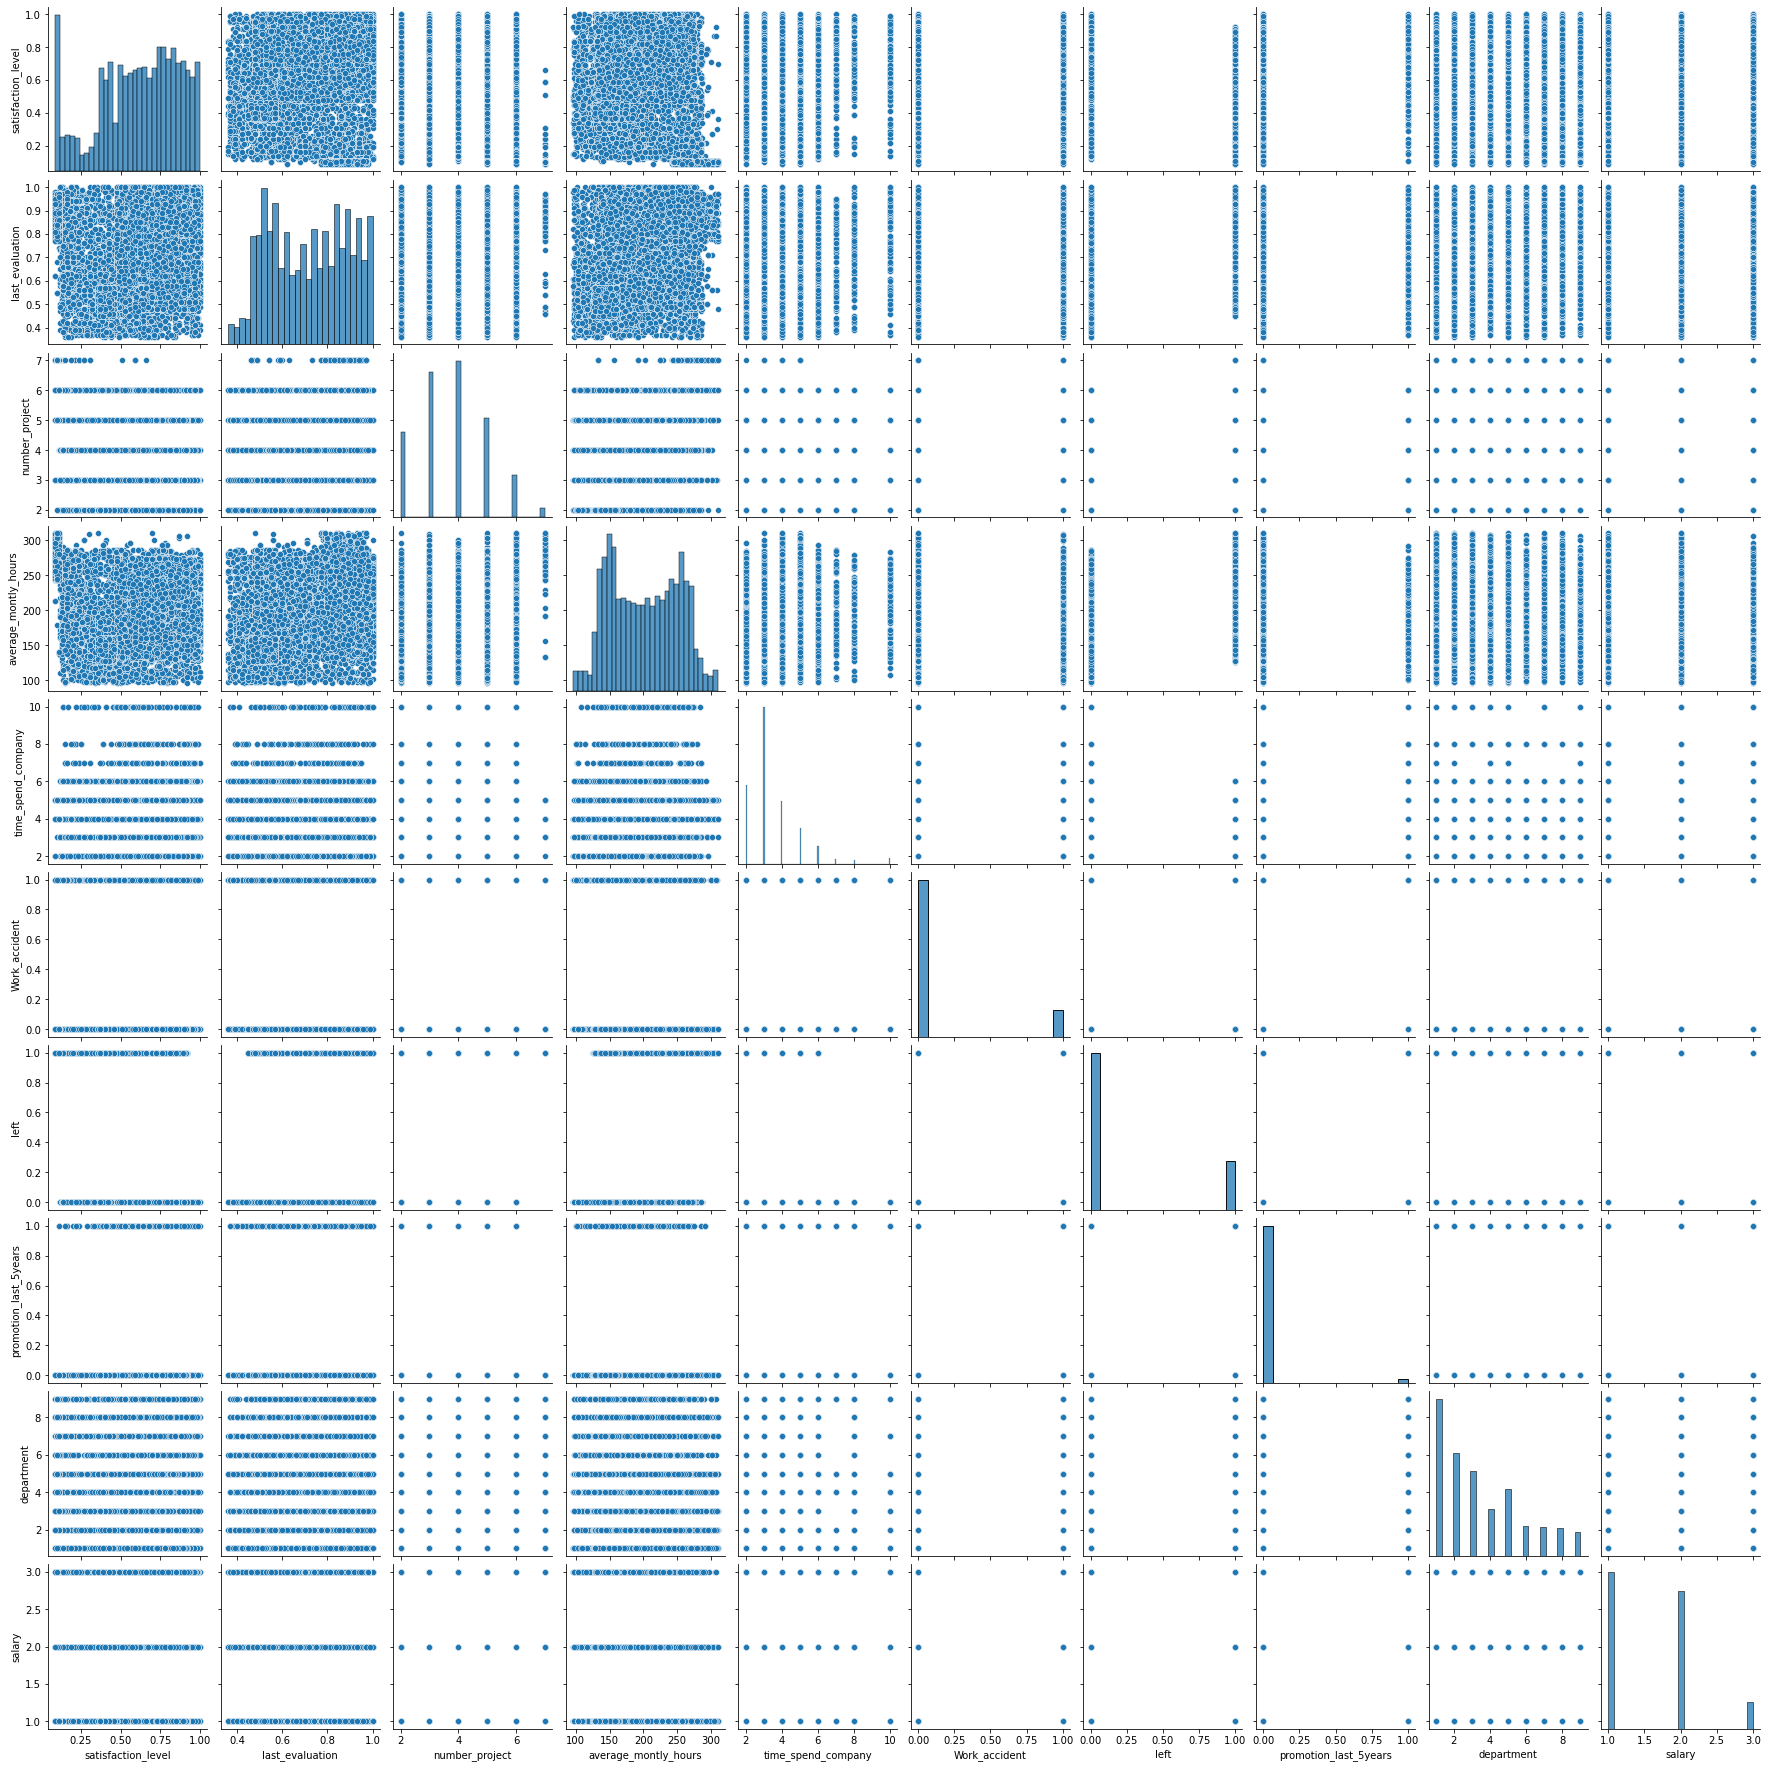

In [33]:
sns.pairplot(df)

In [34]:
# корреляция Пирсона
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.007713,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.005885,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.006792,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.008071,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.043481,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.002881,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.028487,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.067034,0.098119
department,-0.007713,0.005885,-0.006792,-0.008071,0.043481,0.002881,-0.028487,0.067034,1.000000,0.102597
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.102597,1.000000


In [35]:
# корреляция Спирмена
df.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306,-0.008824,0.045381
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167,0.009774,-0.009117
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960,-0.003557,0.004453
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951,-0.007498,0.002452
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205,0.012160,0.001274
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245,0.004919,0.008496
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788,-0.026719,-0.152266
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000,0.041674,0.094273
department,-0.008824,0.009774,-0.003557,-0.007498,0.012160,0.004919,-0.026719,0.041674,1.000000,0.072523
salary,0.045381,-0.009117,0.004453,0.002452,0.001274,0.008496,-0.152266,0.094273,0.072523,1.000000


In [ ]:
""" В корреляционной матрице Пирсона:
1. Наибольшее значение между переменными:
    1.1 number_project (Количество проектов, выполненных за время работы) - average_montly_hours 
    (Среднее количество часов на рабочем месте в месяц)- 0.417. Чем больше человек работает в месяц- тем больше проектов он делает
    1.2 satisfaction_level (Уровень удовлетворенности работой) - left(уволился ли сотрудник)
    Значение -0,388. Этом может значить, что люди, которые не удовлетворены своей работой увольняются.
2. Наименее скореллированные значения:
    1.1 Work_accident (несчастные случаи) - time_spend_company (Стаж работы в компании в годах) - 0.002120
    1.2 salary (относительный уровень зарплаты) - number_project (Количество проектов, выполненных за время работы) -0.001803
 

# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [38]:
# определяем сколько и каких различных значений в сериес "department"
df["department"].value_counts()

1    4140
2    2720
3    2229
5    1760
4    1227
6     787
7     767
8     739
9     630
Name: department, dtype: int64

In [ ]:
""" Поскольку я уже перекодировал значения, поэтому наименования профессий не выводятся
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630

# 5. Показать распределение сотрудников по зарплатам

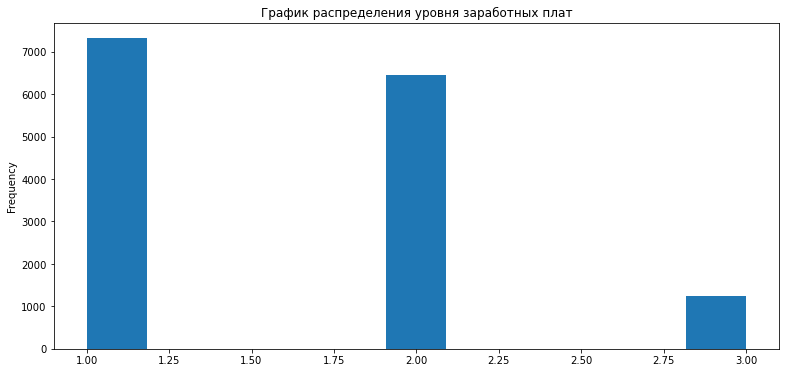

In [117]:
df.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат');

# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

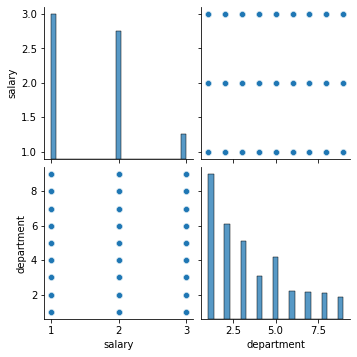

In [220]:
sns.pairplot(df[['salary', 'department']]);

In [130]:
df_sales = df[(df['department']== 1)]
df_technical = df[(df['department']==2)]
df_support = df[(df['department']==3)]
df_IT = df[(df['department']==4)]
df_product_mng = df[(df['department']==5)]
df_RandD = df[(df['department']==6)]
df_accounting = df[(df['department']==7)]
df_hr = df[(df['department']==8)]
df_management = df[(df['department']==9)]


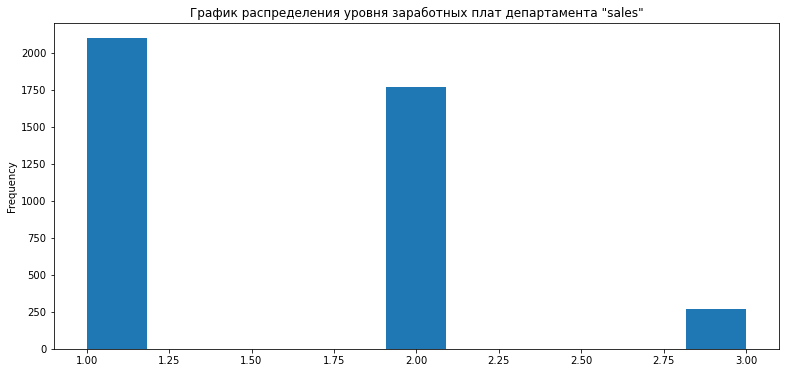

In [131]:
df_sales.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат департамента "sales"');

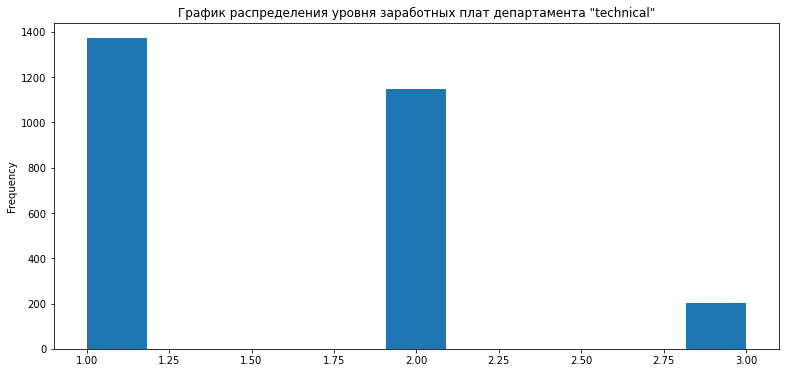

In [132]:
df_technical.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат департамента "technical"');

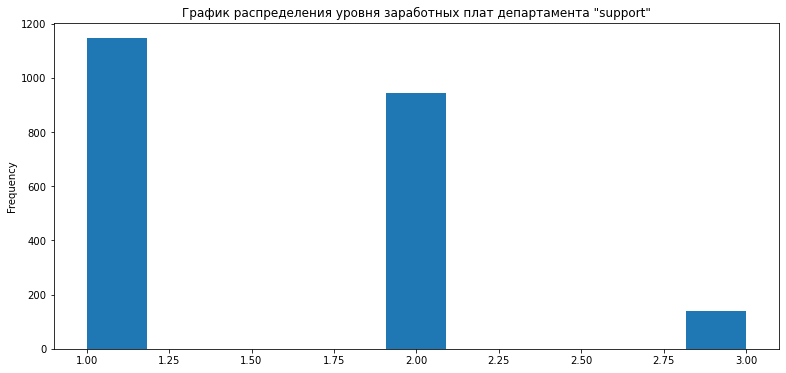

In [133]:
df_support.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат департамента "support"');

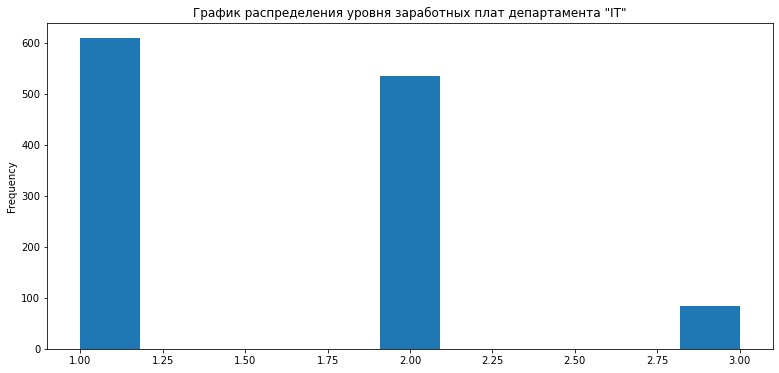

In [134]:
df_IT.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат департамента "IT"');

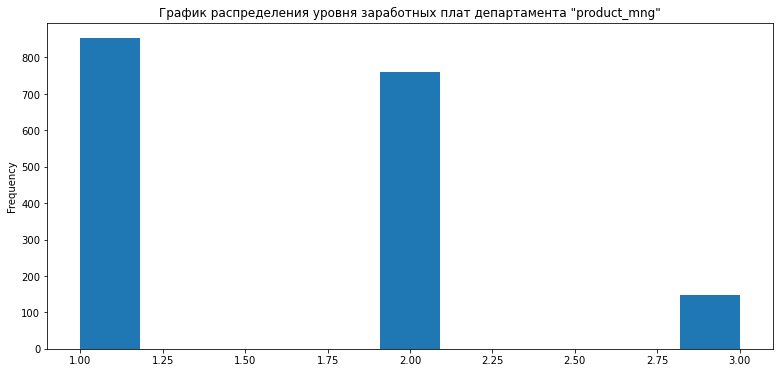

In [135]:
df_product_mng.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат департамента "product_mng"');

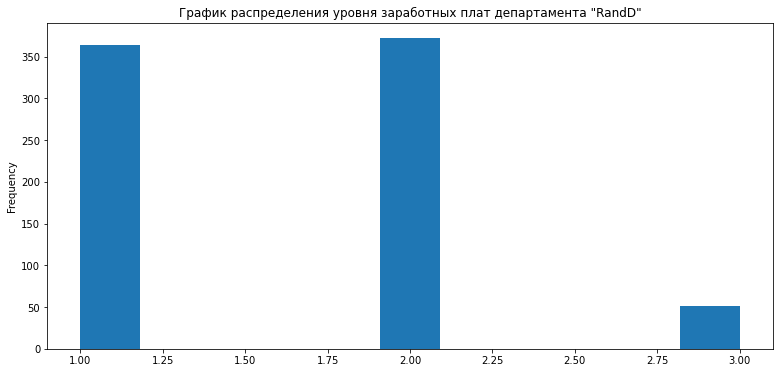

In [136]:
df_RandD.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат департамента "RandD"');

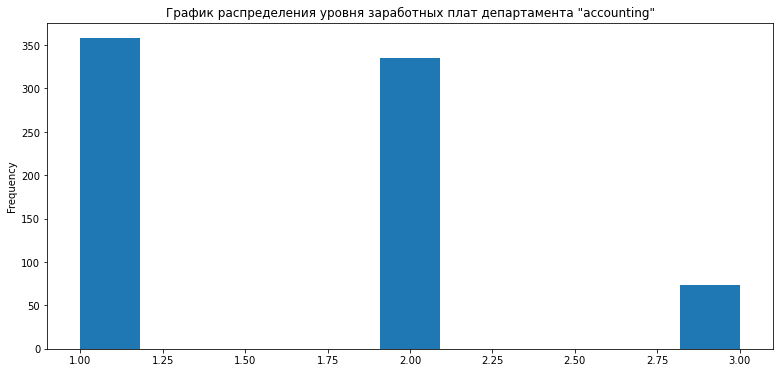

In [137]:
df_accounting.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат департамента "accounting"');

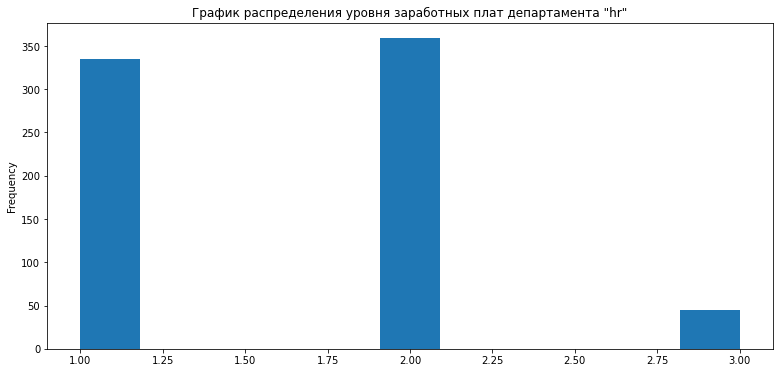

In [138]:
df_hr.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат департамента "hr"');

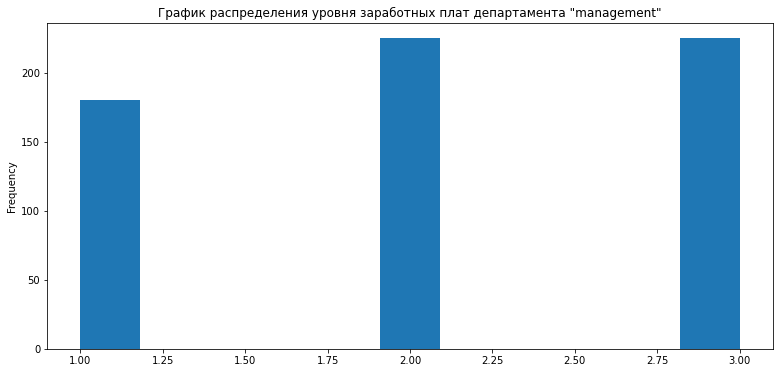

In [139]:
df_management.salary.plot(kind='hist', 
                   bins=11,
                   title='График распределения уровня заработных плат департамента "management"');

# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [95]:
df_7 = pd.read_csv('C:\\Users\\kuznecov.ap\\Desktop\\piton\\23. диплом\\HR.csv')
df_low = df_7[(df_7['salary']=='low')]
df_high = df_7[(df_7['salary']=='high')]


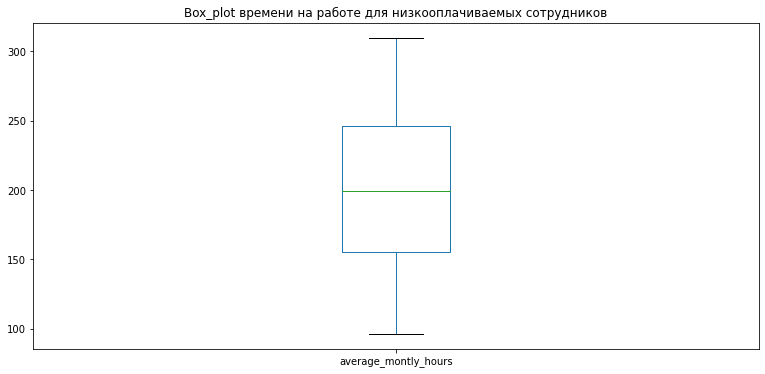

In [221]:
df_low.average_montly_hours.plot(kind='box',
                   title='Box_plot времени на работе для низкооплачиваемых сотрудников');

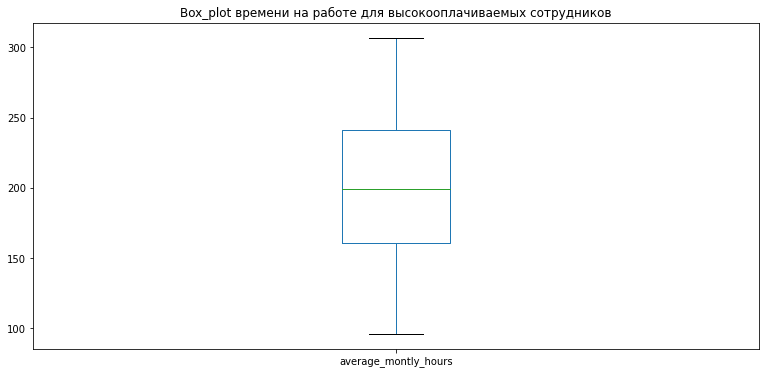

In [222]:
df_high.average_montly_hours.plot(kind='box',
                   title='Box_plot времени на работе для высокооплачиваемых сотрудников');

In [93]:
df_high.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000
mean,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
std,0.226791,0.158608,1.088684,47.710446,1.977885,0.362255,0.248888,0.234226
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.500000,0.570000,3.000000,161.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.700000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000
75%,0.810000,0.840000,5.000000,241.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,307.000000,10.000000,1.000000,1.000000,1.000000


In [94]:
df_low.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000
mean,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
std,0.254594,0.173261,1.281822,50.832214,1.303818,0.349232,0.456916,0.094558
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.420000,0.550000,3.000000,155.000000,3.000000,0.000000,0.000000,0.000000
50%,0.630000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,246.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
"""
Как видим наша гипотеза о том, что высокооплачиваемые сотрудники проводят на работе времени больше, чем низкооплачиваемые
не подтвердилась. Все описательные статистики идентичны.

# 8. Рассчитать показатели среди уволившихся и не уволившихся сотрудников

In [100]:
df_left_0 = df_7[(df_7['left']== 0)] # не уволившиеся сотрудники
df_left_1 = df_7[(df_7['left']== 1)] # уволившиеся сотрудники


In [102]:
# Доля сотрудников с повышением за последние 5 лет среди неуволившихся сотрудников. "0" не повышались, "1" повышались
df_left_0['promotion_last_5years'].value_counts(normalize=True).head()

0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64

In [ ]:
# доля 2.6%

In [103]:
# Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников. "0" не повышались, "1" повышались
df_left_1['promotion_last_5years'].value_counts(normalize=True).head()

0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64

In [ ]:
# доля 5.3%

In [105]:
# Средняя степень удовлетворенности среди неуволившихся сотрудников. 
df_left_0['satisfaction_level'].mean()

0.666809590479516

In [106]:
# Средняя степень удовлетворенности среди уволившихся сотрудников. 
df_left_1['satisfaction_level'].mean()

0.44009801176140917

In [107]:
# Среднее количество проектов среди неуволившихся сотрудников. 
df_left_0['number_project'].mean()

3.786664333216661

In [108]:
# Среднее количество проектов среди уволившихся сотрудников. 
df_left_1['number_project'].mean()

3.8555026603192384

# 9. Построить модель LDA

In [140]:
# В задании сказано убрать данные department и salary, но поскольку данные были перекодированы, 
# считаю, что имеет смысл оставить эти данные в модели.
# факторы могут являться ключевыми при увольнении сотрудников. В некоторых отделах меньше текучка и возможно текучка 
# меньше у сотрудников с высокой зарабоной платой

In [178]:

data_class = df['left']

In [167]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data_class, test_size=0.25)

In [179]:
len(y_test)

3750

In [168]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [169]:
lda = LinearDiscriminantAnalysis()

In [170]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [171]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [182]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T


In [191]:
from sklearn.metrics import accuracy_score # среди метрик: Accuracy, precision и recall - accuracy дает самый высокий прогноз

In [189]:
accuracy_score(y_test, lda.predict(X_test))

0.7754666666666666

In [192]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.63398137e+00,  6.47463833e-01, -2.45367555e-01,
         4.51503895e-03,  2.43394380e-01, -1.13283594e+00,
        -1.65943484e-16, -8.58886307e-01, -3.09947890e-02,
        -6.90921813e-01]])

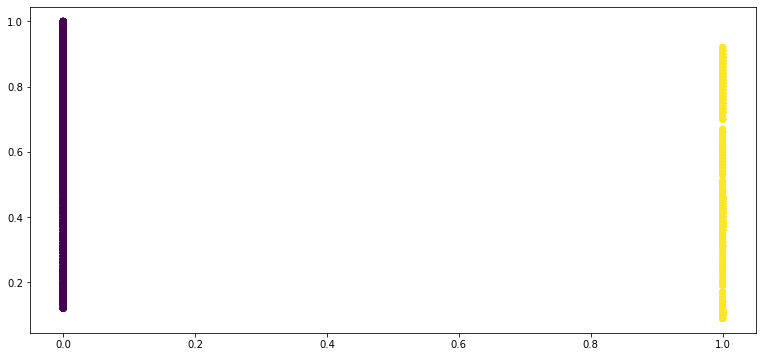

In [193]:
# визуализируем дискриминантную линию по значениям: "уволился ли сотрудник" - "Уровень удовлетворенности работой"
plt.scatter(X_train['left'], X_train['satisfaction_level'], c=y_train)
plt.show()

In [196]:
small_train = X_train
small_train = small_train[['left', 'satisfaction_level']]
sy_train = y_train
small_test = X_test
small_test = small_test[['left', 'satisfaction_level']]
sy_test = y_test

In [200]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)
# посмотрим на наши центроиды
lda_small.means_

array([[0.        , 0.66853975],
       [1.        , 0.43718494]])

In [208]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

<ipython-input-209-5ab5223a56a1>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


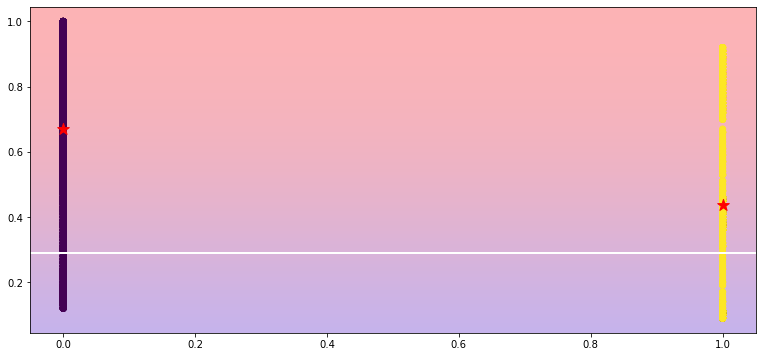

In [209]:
# сам scatter plot
plt.scatter(small_train['left'], small_train['satisfaction_level'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [210]:
lda_small.coef_ 

array([[ 0.        , -4.41253651]])

In [211]:
accuracy_score(sy_test, lda_small.predict(small_test)) # качество модели на тестовой выборке

0.7589333333333333

In [212]:
# заменим модель на логистическую регресиию
from sklearn.linear_model import LogisticRegression

In [213]:
lr = LogisticRegression()
lr.fit(small_train, sy_train)

LogisticRegression()

In [214]:
lr.predict(small_test)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [215]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [216]:
lr.coef_

array([[11.82013078, -1.12291489]])

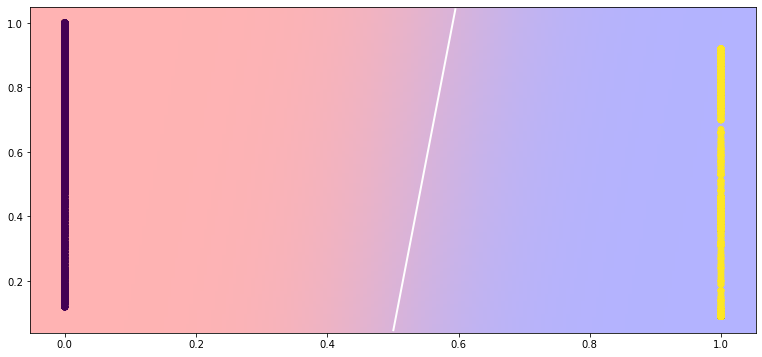

In [218]:
plt.scatter(small_train['left'], small_train['satisfaction_level'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()